In [1]:
import numpy as np
from rubin_sim.data import get_data_dir
from rubin_sim.site_models import FieldsDatabase
import os
from rubin_sim.utils import ra_dec_from_xyz
%matplotlib inline
import matplotlib.pylab as plt
from rubin_sim.scheduler.utils import read_fields, empty_observation
from rubin_sim.scheduler.features import NObservations
from rubin_sim.scheduler.utils import HpInLsstFov
import healpy as hp

In [2]:

ack = read_fields()

In [3]:
len(ack)

5292

In [4]:
cov = np.genfromtxt(os.path.join(get_data_dir(), 'site_models/icover.3.5292.23.0.txt'))

In [5]:
x = cov[0::3]
y = cov[1::3]
z = cov[2::3]

In [6]:
ra_dec = ra_dec_from_xyz(x,y,z)

In [7]:
ack

array([(0.        , -1.57079633), (3.14159265, -1.52835961),
       (5.65487426, -1.52835952), ..., (2.51328161,  1.52835952),
       (0.        ,  1.52835961), (0.        ,  1.57079633)],
      dtype=[('RA', '<f8'), ('dec', '<f8')])

In [8]:
ra_dec

array([[ 3.29735014e+01,  6.74169823e+01,  3.78912057e+01, ...,
        -2.69063040e+01, -2.43536328e+01, -2.17802098e+01],
       [ 1.72546435e+01,  2.60395780e+01,  1.42059418e+01, ...,
        -1.55461530e+00, -9.63715011e-08,  1.51522284e+00]])

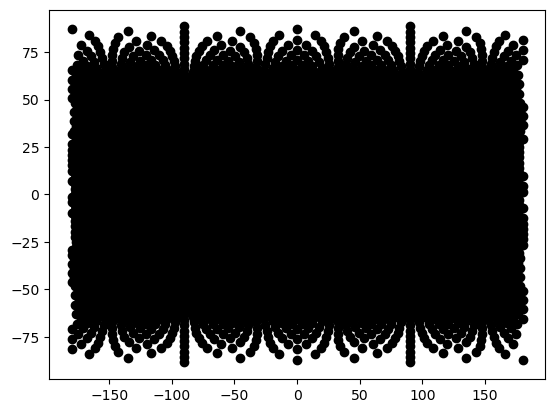

In [9]:
plt.plot(ra_dec[0,:], ra_dec[1,:], 'ko')

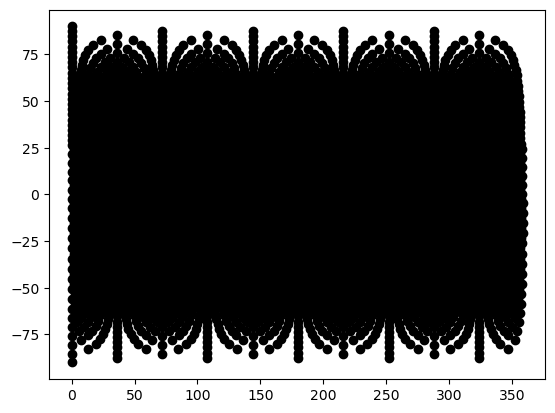

In [10]:
plt.plot(np.degrees(ack['RA']), np.degrees(ack['dec']), 'ko')

In [11]:

nside = 1028

f1 = NObservations(nside=nside)
f2 = NObservations(nside=nside)
pointing2hpindx = HpInLsstFov(nside=nside)

obs = empty_observation()
for ra,dec in zip(ra_dec[0,:], ra_dec[1,:]):
    indx = pointing2hpindx(np.radians(ra), np.radians(dec), rotSkyPos=0)
    f1.add_observation(obs, indx=indx)

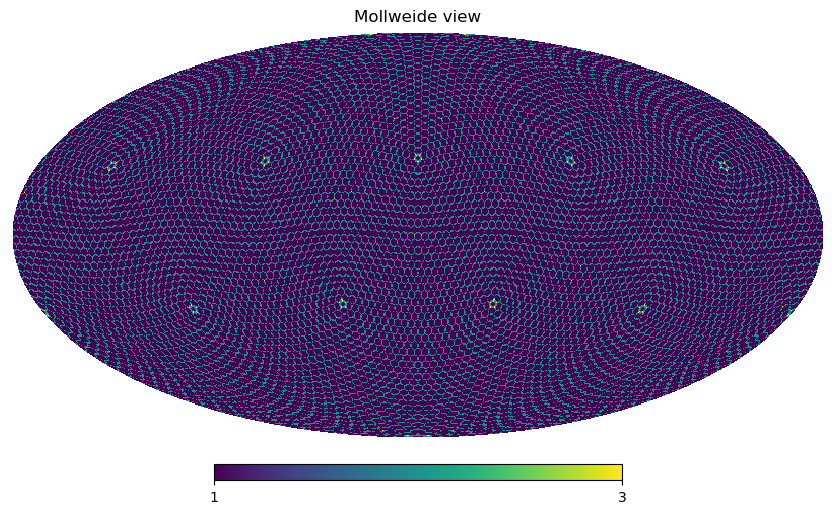

In [12]:
hp.mollview(f1.feature, rot=(0,-60))

In [13]:
for ra,dec in zip(ack['RA'], ack['dec']):
    indx = pointing2hpindx(ra, dec, rotSkyPos=0)
    f2.add_observation(obs, indx=indx)
    

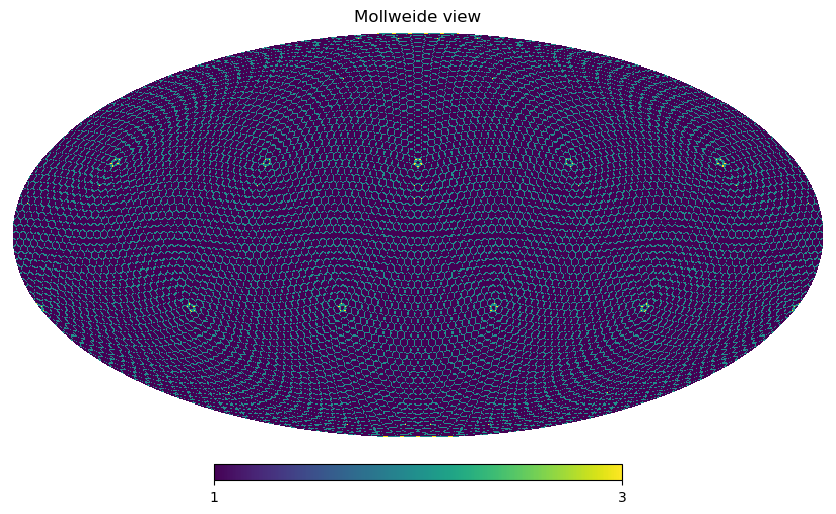

In [14]:
hp.mollview(f2.feature, rot=(0,0,0))

In [15]:
# OK, so those look the same except for a rotation difference.